In [ ]:
!pip install pyLDAvis==2.1.2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [9]:
url = "https://raw.githubusercontent.com/hasin-shabbir/coursedatafiles/main/hcds_pk_electables_survey.csv"
df = pd.read_csv(url)

In [10]:
df.head(5)

,What age group do you belong to?,Which of the following would best describe your current area of living?,"Generally, would you rather vote for the candidate of your preferred political party or a popular electable from a different party?",Would you rather vote for an electable representing your preferred political party who has a manifesto that you don't agree with or a candidate from a different party whose manifesto you agree with more?,Would you rather vote for a candidate from your own political party with a manifesto you agree with or an electable from a different party who is more popular locally but has a manifesto you don't agree with?,Would you rather vote for a candidate from your own political party with a manifesto you do NOT agree with or an electable from a different party who is more popular locally and has a manifesto you agree with?,Would you vote for a popular electable who recently joined your preferred political party despite the fact that they had a completely different stance in a different political party recently?,Do you think that electables play a significant role in determining the election outcome in your own constituency,Do you think that electables play a significant role in determining the overall election outcome for the National Assembly?,Any comments about what you think is the impact of electables on general elections in Pakistan?
0,18-25,Rural,Candidate from preferred party,Electable from preferred party,Candidate from preferred party,Electable from a different party,Yes,Yes,Yes,NaN
1,26-45,Urban,Electable from a different party,Electable from preferred party,Candidate from preferred party,Electable from a different party,Yes,Yes,Yes,NaN
2,18-25,Urban,Candidate from preferred party,Electable from preferred party,Electable from a different party,Electable from a different party,No,No,Yes,NaN
3,18-25,Rural,Electable from a different party,Candidate from a different party,Candidate from preferred party,Electable from a different party,Yes,No,No,Electables have strength but they can be defea...
4,45 and above,Rural,Electable from a different party,Candidate from a different party,Candidate from preferred party,Candidate from preferred party,Yes,No,Yes,NaN


## General preference
Who do people generally prefer voting.

In [82]:
def vals_split_general(df, col_num):
  '''
  Function returns the percentage split of preference given to electables and
  to the other candidate within the passed in dataframe and column (case)
  '''
  vals = []
  
  val_counts = df.iloc[:,col_num].value_counts()
  len = val_counts[0]+val_counts[1]

  if 'electable' in val_counts.keys()[0].lower():
    vals.append(val_counts[0]/len*100)
    vals.append(val_counts[1]/len*100)
  else:
    vals.append(val_counts[1]/len*100)
    vals.append(val_counts[0]/len*100)
  return vals

In [85]:
vals = vals_split_general(df,2)

Who do people generally prefer voting according to age group.

In [86]:
u25_df = df[df.iloc[:,0]=='18-25']
u45_df = df[df.iloc[:,0]=='26-45']
above45_df = df[df.iloc[:,0]=='45 and above']

u25_vals = vals_split_general(u25_df,2)
u45_vals = vals_split_general(u45_df,2)
above45_vals = vals_split_general(above45_df,2)

Who do people generally prefer voting according to area of living (rural-urban divide).

In [87]:
rural_df = df[df.iloc[:,1]=='Rural']
urban_df = df[df.iloc[:,1]=='Urban']

rural_vals = vals_split_general(rural_df,2)
urban_vals = vals_split_general(urban_df,2)

Plots:

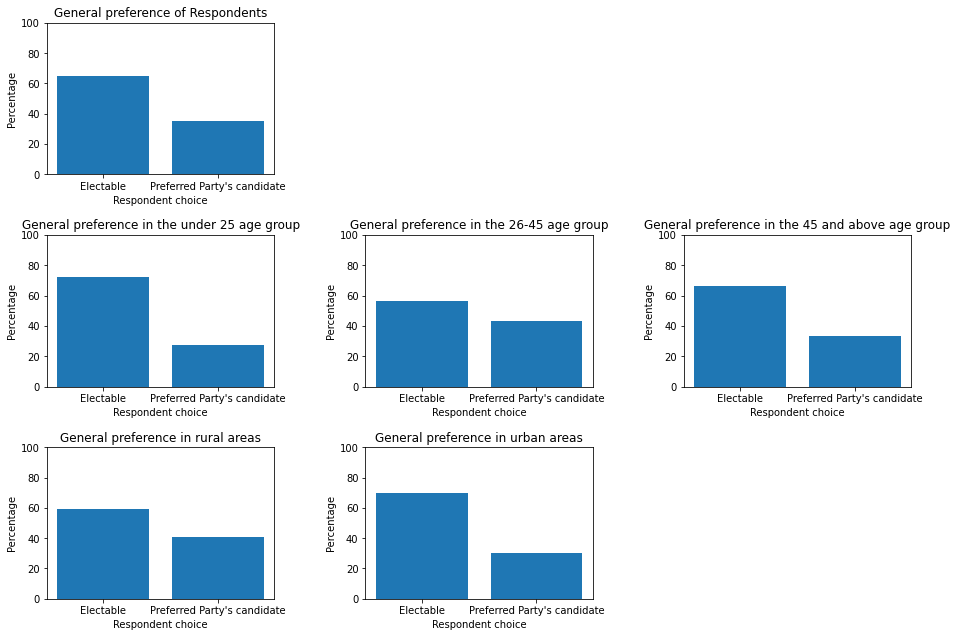

In [88]:
x_axis = ['Electable','Preferred Party\'s candidate']

fig1 = plt.figure(figsize = (15, 10))

#for overall responses
plt.subplot(3,3,1)
# creating the bar plot
plt.bar(x_axis, vals)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("General preference of Respondents")
ax = plt.gca()
ax.set_ylim([0, 100])

## for age split:
plt.subplot(3,3,4)
plt.bar(x_axis, u25_vals)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("General preference in the under 25 age group")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,5)
plt.bar(x_axis, u45_vals)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("General preference in the 26-45 age group")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,6)
plt.bar(x_axis, above45_vals)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("General preference in the 45 and above age group")
ax = plt.gca()
ax.set_ylim([0, 100])

##for rural urban split
plt.subplot(3,3,7)
plt.bar(x_axis, rural_vals)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("General preference in rural areas")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,8)
plt.bar(x_axis, urban_vals)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("General preference in urban areas")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

#### Observation and conclusion:
It can be observed that generally, and within each age group and type of area of living, electables are generally more favoured against a preferred party's candidate. This percentage is especially higher for electables in urban areas and for respondents in the 18-25 age group.



## Specific preferences:

#### Case 1: In case the electable is from the preferred political party but with a manifesto that the respondent doesn't agree with versus a candidate from a different political party whose manifesto the respondent agrees with more.

In [89]:
case1_vals = vals_split_general(df, 3)
case1_vals_u25 = vals_split_general(u25_df, 3)
case1_vals_u45 = vals_split_general(u45_df, 3)
case1_vals_above45 = vals_split_general(above45_df, 3)
case1_vals_rural = vals_split_general(rural_df, 3)
case1_vals_urban = vals_split_general(urban_df, 3)

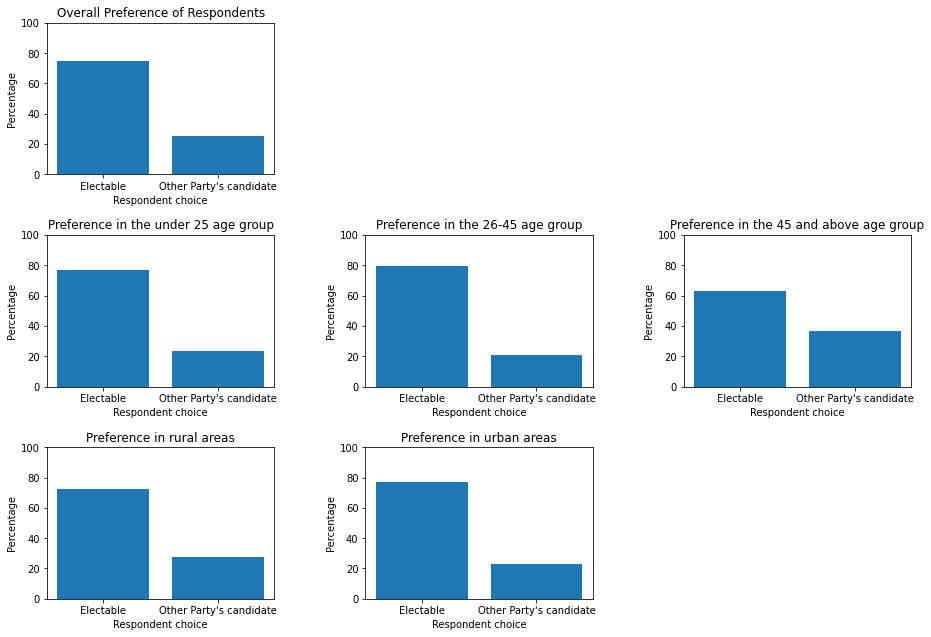

In [92]:
x_axis = ['Electable','Other Party\'s candidate']

fig2 = plt.figure(figsize = (15, 10))

#for overall responses
plt.subplot(3,3,1)
# creating the bar plot
plt.bar(x_axis, case1_vals)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Overall Preference of Respondents")
ax = plt.gca()
ax.set_ylim([0, 100])

## for age split:
plt.subplot(3,3,4)
plt.bar(x_axis, case1_vals_u25)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in the under 25 age group")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,5)
plt.bar(x_axis, case1_vals_u45)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in the 26-45 age group")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,6)
plt.bar(x_axis, case1_vals_above45)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in the 45 and above age group")
ax = plt.gca()
ax.set_ylim([0, 100])

##for rural urban split
plt.subplot(3,3,7)
plt.bar(x_axis, case1_vals_rural)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in rural areas")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,8)
plt.bar(x_axis, case1_vals_urban)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in urban areas")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

#### Observation and conclusion:
In this case, it is visible that electables have significantly higher advantage in all of the demographic divides when they are from the political party the respondent preferred even if the electable's manifesto is one that the respondent didn't agree with and agreed more with other party's candidate's manifesto more.

#### Case 2: In case the electable is from a different political party and has a manifesto that the respondent does not agree with but is more popular locally than the candidate from the respondent's preferred political party who has a manifesto the respondent agrees with.

In [93]:
case2_vals = vals_split_general(df, 4)
case2_vals_u25 = vals_split_general(u25_df, 4)
case2_vals_u45 = vals_split_general(u45_df, 4)
case2_vals_above45 = vals_split_general(above45_df, 4)
case2_vals_rural = vals_split_general(rural_df, 4)
case2_vals_urban = vals_split_general(urban_df, 4)

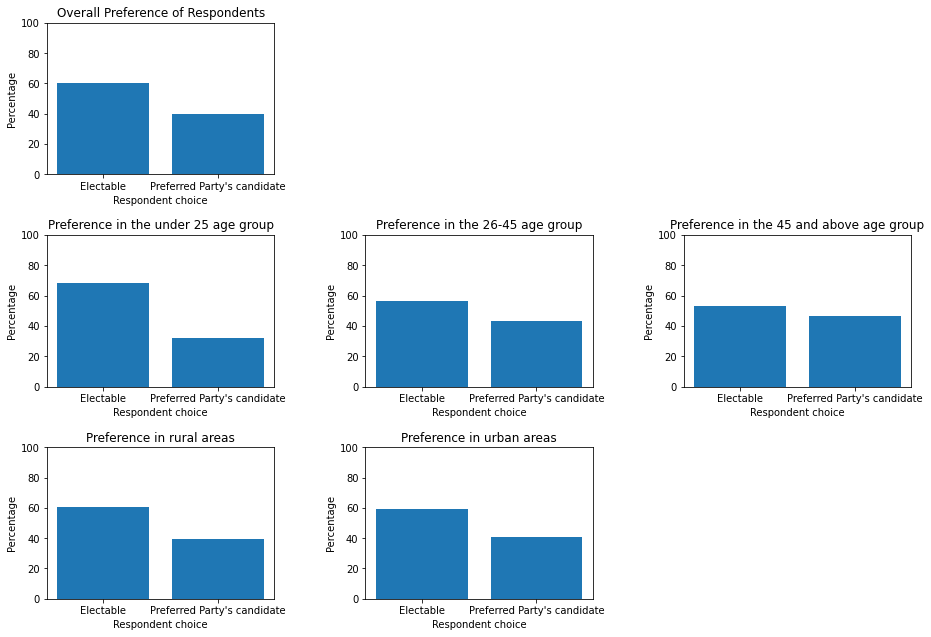

In [94]:
x_axis = ['Electable','Preferred Party\'s candidate']

fig3 = plt.figure(figsize = (15, 10))

#for overall responses
plt.subplot(3,3,1)
# creating the bar plot
plt.bar(x_axis, case2_vals)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Overall Preference of Respondents")
ax = plt.gca()
ax.set_ylim([0, 100])

## for age split:
plt.subplot(3,3,4)
plt.bar(x_axis, case2_vals_u25)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in the under 25 age group")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,5)
plt.bar(x_axis, case2_vals_u45)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in the 26-45 age group")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,6)
plt.bar(x_axis, case2_vals_above45)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in the 45 and above age group")
ax = plt.gca()
ax.set_ylim([0, 100])

##for rural urban split
plt.subplot(3,3,7)
plt.bar(x_axis, case2_vals_rural)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in rural areas")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,8)
plt.bar(x_axis, case2_vals_urban)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in urban areas")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

#### Observation and conclusion:
In this case, it can be seen that the electables still have an advantage. They are more favoured by the respondents than the preferred party's candidate even though they have a manifesto that the respondent agrees with less. However, there is a drop in favour for electables in this case as compared to the previous case when the electable was from the respondent's preferred party.

Exploration of these 2 cases suggests that while preferrence of political party plays an important role in a candidate being favoured, the electables still hold the majority strength in favourability regardless of their political association.

#### Case 3: In case the electable is from a different political party and has a manifesto that the respondent agrees with and is more popular locally than the candidate from the respondent's preferred political party who has a manifesto the respondent does NOT agree with.



In [95]:
case3_vals = vals_split_general(df, 5)
case3_vals_u25 = vals_split_general(u25_df, 5)
case3_vals_u45 = vals_split_general(u45_df, 5)
case3_vals_above45 = vals_split_general(above45_df, 5)
case3_vals_rural = vals_split_general(rural_df, 5)
case3_vals_urban = vals_split_general(urban_df, 5)

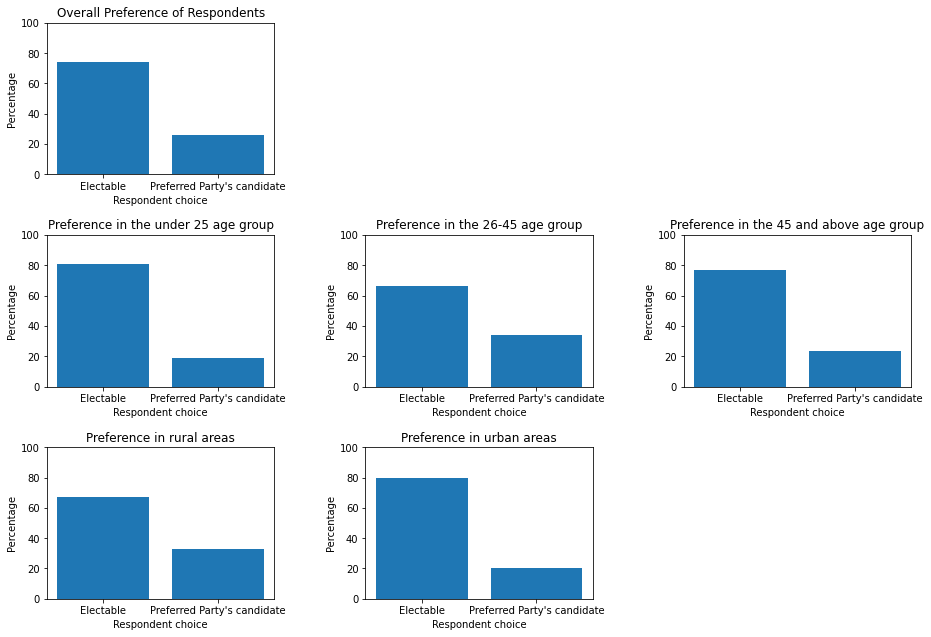

In [97]:
x_axis = ['Electable','Preferred Party\'s candidate']

fig4 = plt.figure(figsize = (15, 10))

#for overall responses
plt.subplot(3,3,1)
# creating the bar plot
plt.bar(x_axis, case3_vals)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Overall Preference of Respondents")
ax = plt.gca()
ax.set_ylim([0, 100])

## for age split:
plt.subplot(3,3,4)
plt.bar(x_axis, case3_vals_u25)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in the under 25 age group")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,5)
plt.bar(x_axis, case3_vals_u45)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in the 26-45 age group")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,6)
plt.bar(x_axis, case3_vals_above45)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in the 45 and above age group")
ax = plt.gca()
ax.set_ylim([0, 100])

##for rural urban split
plt.subplot(3,3,7)
plt.bar(x_axis, case3_vals_rural)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in rural areas")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,8)
plt.bar(x_axis, case3_vals_urban)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in urban areas")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

#### Observation and conclusion:
In this case, we can see that the electables are still more favoured over the preferred party's candidate. Furthermore, as compared to the previous scenario, in this case the electables are favoured more which could be attributed to the fact that in this case the electable had a manifesto that the respondent agreed with more.

#### Case 4: In case the electable has just joined the respondent's preferred political party and had a completely different stance in a different political party recently.

In [110]:
def vals_split_case4(df, col_num):
  '''
  Function returns the percentage split of preference given to electables and
  to preferred party's candidate within the passed in dataframe
  '''
  vals = [0,0,0]
  
  val_counts = df.iloc[:,col_num].value_counts()
  len = sum(val_counts)
  
  vals[0]+=val_counts['Yes']
  vals[1]+=val_counts['No']
  vals[2]+=val_counts['Maybe']

  for i in range(3):
    vals[i]= vals[i]/len*100

  return vals

In [112]:
case4_vals = vals_split_case4(df, 6)
case4_vals_u25 = vals_split_case4(u25_df, 6)
case4_vals_u45 = vals_split_case4(u45_df, 6)
case4_vals_above45 = vals_split_case4(above45_df, 6)
case4_vals_rural = vals_split_case4(rural_df, 6)
case4_vals_urban = vals_split_case4(urban_df, 6)

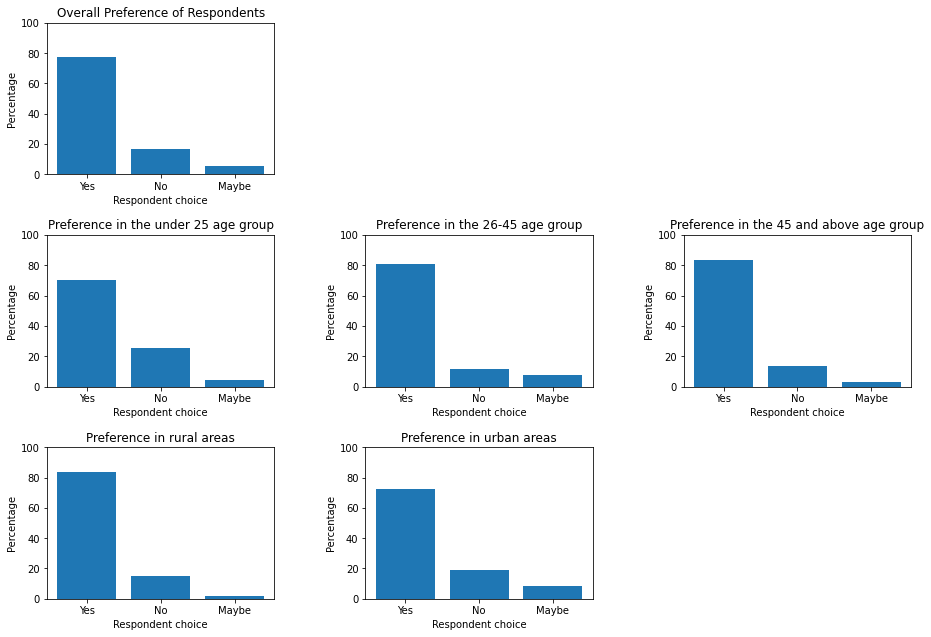

In [113]:
x_axis = ['Yes','No','Maybe']

fig5 = plt.figure(figsize = (15, 10))

#for overall responses
plt.subplot(3,3,1)
# creating the bar plot
plt.bar(x_axis, case4_vals)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Overall Preference of Respondents")
ax = plt.gca()
ax.set_ylim([0, 100])

## for age split:
plt.subplot(3,3,4)
plt.bar(x_axis, case4_vals_u25)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in the under 25 age group")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,5)
plt.bar(x_axis, case4_vals_u45)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in the 26-45 age group")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,6)
plt.bar(x_axis, case4_vals_above45)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in the 45 and above age group")
ax = plt.gca()
ax.set_ylim([0, 100])

##for rural urban split
plt.subplot(3,3,7)
plt.bar(x_axis, case4_vals_rural)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in rural areas")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplot(3,3,8)
plt.bar(x_axis, case4_vals_urban)
plt.xlabel("Respondent choice")
plt.ylabel("Percentage")
plt.title("Preference in urban areas")
ax = plt.gca()
ax.set_ylim([0, 100])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

#### Observation and conclusion:
In this case, it can be seen that apparently it does not matter if an electable had a different manifesto/stance recently. They are favoured significantly by the respondents when the electable has joined the respondent's favoured political party regardless of their change in stance.

From case 2, 3, and 4 we can also conclude that while the manifesto of an electable and how much a respondent agrees with it leads to slight variation in their favourability, it still does not make a significant impact. Thus, the electables seem to be favoured almost always in the local election situation regardless of their political affiliation and alignment of manifesto with that of the voter with little variation. This suggests that electables hold a strong position in the general elections.

## General perception of electables' impact on elections:
Next, we explore what do the respondents think about the impact of electables on elections. For this, we asked two simple questions with a binary response: Do the respondents think electables impact election results in their local constituency and the overall national results?

In [114]:
def vals_split_perception(df, col_num):
  '''
  Function returns the percentage split of preference given to electables and
  to preferred party's candidate within the passed in dataframe
  '''
  vals = [0,0]
  
  val_counts = df.iloc[:,col_num].value_counts()
  len = sum(val_counts)
  
  vals[0]+=val_counts['Yes']
  vals[1]+=val_counts['No']

  for i in range(2):
    vals[i]= vals[i]/len*100

  return vals

In [115]:
perception_vals_local = vals_split_perception(df, 7)
perception_vals_national = vals_split_perception(df, 8)

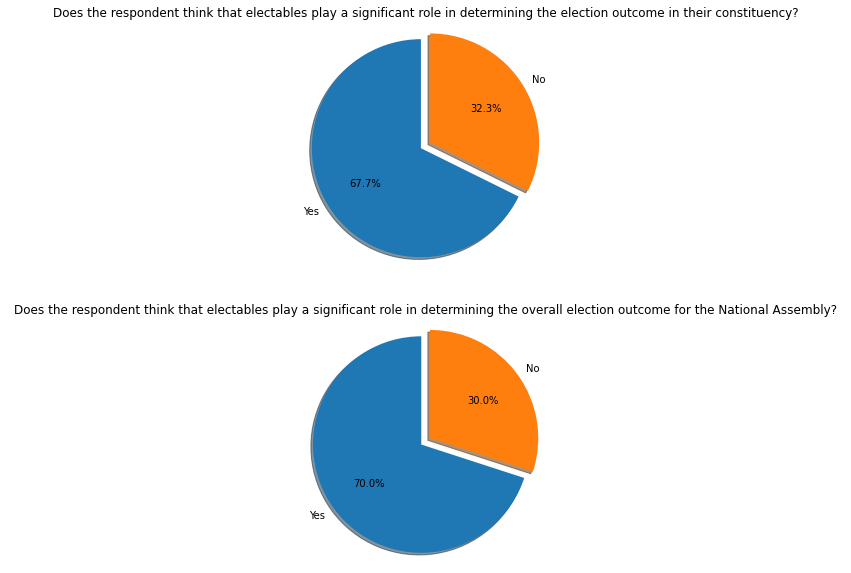

In [125]:
labels = ['Yes', 'No']
explode = (0.1,0)

fig6 = plt.figure(figsize = (15, 10))

plt.subplot(2,1,1)
plt.title('Does the respondent think that electables play a significant role in determining the election outcome in their constituency?')
plt.pie(perception_vals_local, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode)
plt.axis('equal')

plt.subplot(2,1,2)
plt.title('Does the respondent think that electables play a significant role in determining the overall election outcome for the National Assembly?')
plt.pie(perception_vals_national, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,explode=explode)
plt.axis('equal')

plt.show()

#### Observation and conclusion:
It is observed that the at least two-thirds of the respondents believe that electables play a significant role in determining the election outcome in their constituency and for the National Assembly as a whole.

## Custom response analysis:
We also allowed respondents to comment on what they think is the impact of electables in the general elections in Pakistan. We will now explore some common themes through topic modeling to understand the impact and the reason/s behind this impact.

Interestingly, only 11 respondents out of the total 130 choose to comment on the impact of electables.

We use Latenet Dirichlent Allocation (LDA) as our topic modeling method.

In [128]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [130]:
comments = df.iloc[:,-1].dropna().values.tolist()

In [134]:
preprocessed_comments = list(sent_to_words(comments))

In [137]:
# Create Dictionary
id2word_comments = corpora.Dictionary(preprocessed_comments)
# Create Corpus
texts_comments = preprocessed_comments
# Term Document Frequency
corpus_comments = [id2word_comments.doc2bow(text) for text in texts_comments]

In [142]:
lda_comments = gensim.models.ldamodel.LdaModel(corpus=corpus_comments,
                                                   id2word=id2word_comments,
                                                   num_topics=10, 
                                                   random_state=100,
                                                   update_every=1,
                                                   chunksize=100,
                                                   passes=10,
                                                   alpha='auto',
                                                   per_word_topics=True)

In [143]:
pyLDAvis.enable_notebook()
vis_comments = pyLDAvis.gensim.prepare(lda_comments, corpus_comments, id2word_comments, sort_topics=False)
pyLDAvis.display(vis_comments)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


#### Observation and conclusion:
From the topic modeling using the parameters set above, some common themes appear in the comments from the respondents. Of these, some interesting ones are listed below:


*   Money
*   Power
*   Strength
*   Popular
*   Local
*   Communities
*   Connection
*   Corrupt
*   Manipulate

These themes, cross-examined with the comments, reveals that respondents believe that electables are able to find their strength through the use of money and corruption, their political popularity and strength, and their connection to local communities which in turn gives them political strength and popularity. 
The comments also suggest that electables play an important and significant role in determining election outcomes and victory.
